### **Employee Burnout Prediction**

#### Employee burnout is a state of physical, emotional and mental exhaustion caused by excessive and prolonged stress. It can have serious consequences on an individual's well-being and can lead to decreased productivity and job performance. In today's fast-paced and constantly connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.

#### dfset Info : 

- **Employee ID** : The unique ID allocated for each employee (example: fffe390032003000)
- **Date of Joining** : The date-time when the employee has joined the organization (example: 2008-12-30)
- **Gender** : The gender of the employee (Male/Female)
- **Company Type** : The type of company where the employee is working (Service/Product)
- **WFH Setup Available** : Is the work from home facility available for the employee (Yes/No)
- **Designation** : The designation of the employee of work in the organization. In the range of [0.0, 5.0] bigger is higher designation.
- **Resource Allocation** : The amount of resource allocated to the employee to work, ie. number of working hours. In the range of [1.0, 10.0] (highermeans more resource)
- **Mental Fatigue Score** : The level of fatigue mentally the employee is facing. In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
- **Burn Rate** : The value we need to predict for each employee telling the rate of Bur out while working. *In the range of [0.0, 1.0] where the higher the value is more is the burn out.* 

#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle as pkl

import warnings
warnings.filterwarnings('ignore')

#### Loading DATASET

In [2]:
df = pd.read_excel('E:/ML projects/24.employee burnout prediction/dataset/employee_burnout_analysis-AI.xlsx')

### Dataset overview

In [3]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [4]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [5]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [8]:
df.shape

(22750, 9)

In [9]:
df.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

#### Checking for null values

In [10]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [11]:
df.isnull().sum().values.sum()

np.int64(4622)

#### Dropping Null values

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

#### Checking for duplicate values

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# dropping Employee ID as it doesn't gives valuable info
df=df.drop(['Employee ID'],axis=1)

In [16]:
df.head(2)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36


#### Changing Categorical features to numerical

In [17]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [18]:
df['Company Type'].unique()

array(['Service', 'Product'], dtype=object)

In [19]:
df['WFH Setup Available'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Company Type']=df['Company Type'].map({'Service':0,'Product':1})
df['WFH Setup Available']=df['WFH Setup Available'].map({'Yes':0,'No':1})

In [21]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,1,0,1,2,3.0,3.8,0.16
1,2008-11-30,0,0,0,1,2.0,5.0,0.36
3,2008-11-03,0,0,0,1,1.0,2.6,0.20
4,2008-07-24,1,0,1,3,7.0,6.9,0.52
5,2008-11-26,0,1,0,2,4.0,3.6,0.29


In [22]:
df.dtypes

Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [23]:
from datetime import datetime

# Assuming `df['Date of Joining']` is a datetime format column
df['Tenure (in years)'] = (datetime.now() - df['Date of Joining']).dt.days / 365

In [24]:
df.head(2)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure (in years)
0,2008-09-30,1,0,1,2,3.0,3.8,0.16,16.112329
1,2008-11-30,0,0,0,1,2.0,5.0,0.36,15.945205


In [25]:
df=df.drop(['Date of Joining'],axis=1)

In [26]:
df.head(2)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure (in years)
0,1,0,1,2,3.0,3.8,0.16,16.112329
1,0,0,0,1,2.0,5.0,0.36,15.945205


#### Exploratory Data Analysis

In [27]:
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure (in years)
0,1,0,1,2,3.0,3.8,0.16,16.112329
1,0,0,0,1,2.0,5.0,0.36,15.945205
3,0,0,0,1,1.0,2.6,0.20,16.019178
4,1,0,1,3,7.0,6.9,0.52,16.298630
5,0,1,0,2,4.0,3.6,0.29,15.956164


In [28]:
df.corr()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure (in years)
Gender,1.000000,-0.009289,-0.073718,-0.110514,-0.141089,-0.145760,-0.156577,0.000686
Company Type,-0.009289,1.000000,-0.000756,-0.008989,-0.005795,-0.004697,-0.005904,0.000228
WFH Setup Available,-0.073718,-0.000756,1.000000,0.231858,0.285384,0.277683,0.307168,-0.002259
Designation,-0.110514,-0.008989,0.231858,1.000000,0.877893,0.691823,0.736412,-0.002507
Resource Allocation,-0.141089,-0.005795,0.285384,0.877893,1.000000,0.799563,0.855005,-0.002069
Mental Fatigue Score,-0.145760,-0.004697,0.277683,0.691823,0.799563,1.000000,0.944389,-0.000037
Burn Rate,-0.156577,-0.005904,0.307168,0.736412,0.855005,0.944389,1.000000,-0.000309
Tenure (in years),0.000686,0.000228,-0.002259,-0.002507,-0.002069,-0.000037,-0.000309,1.000000


In [29]:
df[['Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']].corr()['Burn Rate'][:-1]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Name: Burn Rate, dtype: float64

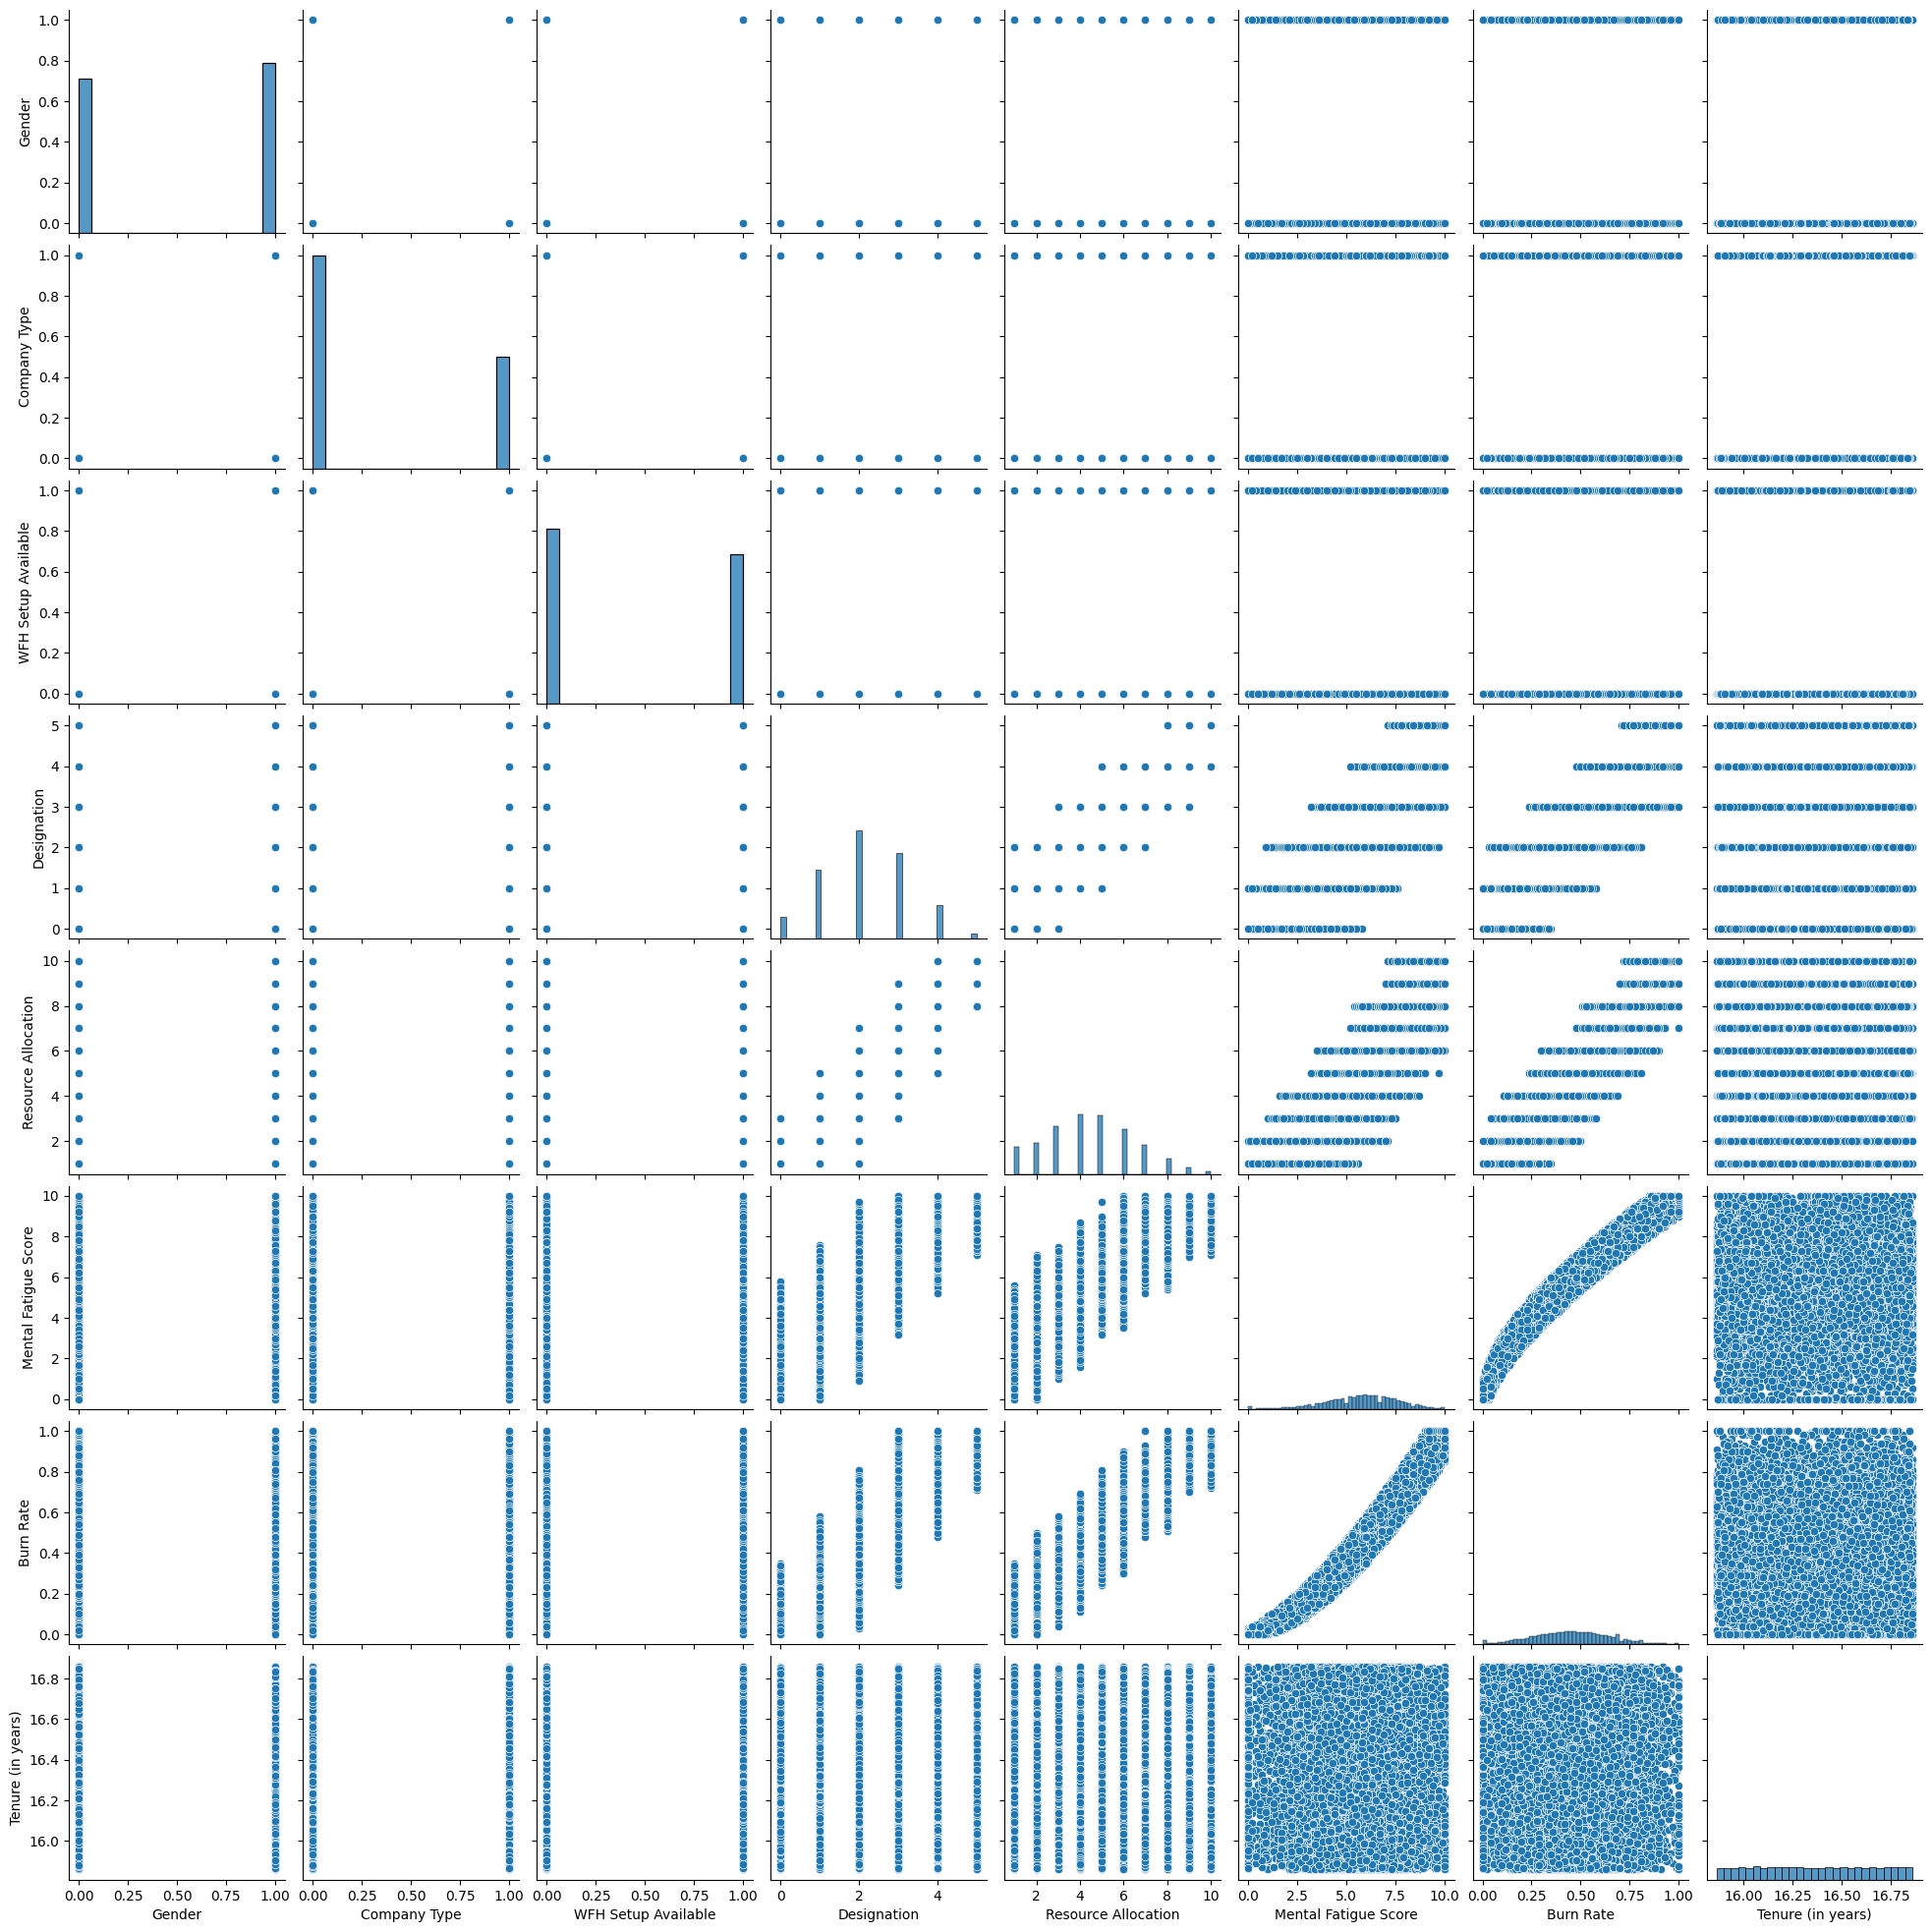

In [30]:
sns.pairplot(df)

In [31]:
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure (in years)
0,1,0,1,2,3.0,3.8,0.16,16.112329
1,0,0,0,1,2.0,5.0,0.36,15.945205
3,0,0,0,1,1.0,2.6,0.20,16.019178
4,1,0,1,3,7.0,6.9,0.52,16.298630
5,0,1,0,2,4.0,3.6,0.29,15.956164


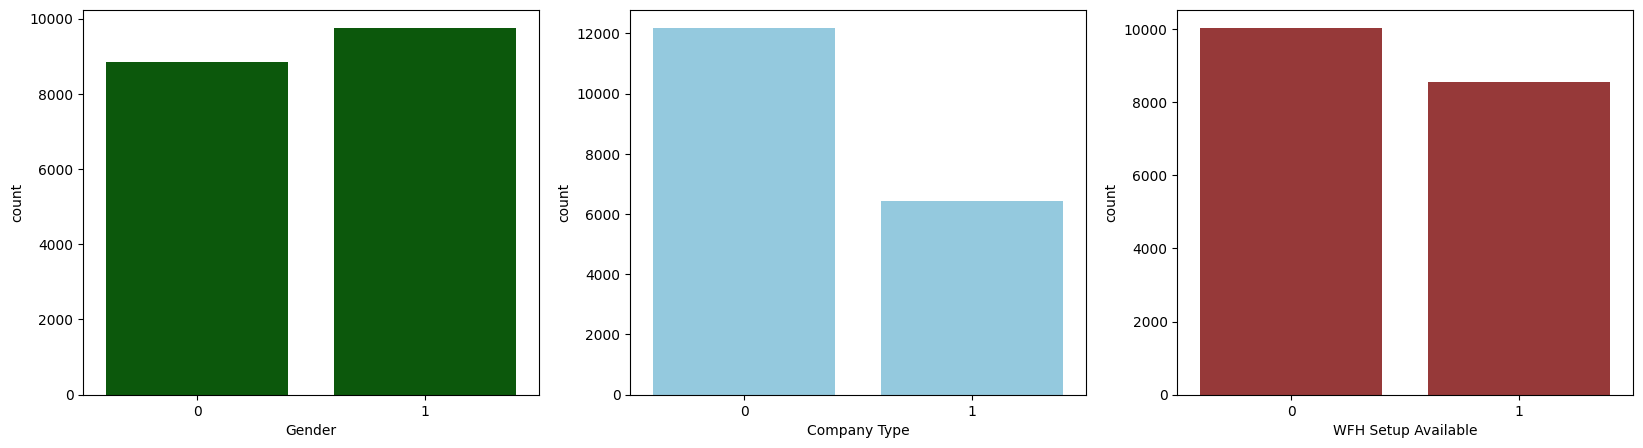

In [42]:
plt.figure(figsize=(20,5))
j=1
for i in ['Gender','Company Type','WFH Setup Available']:
    plt.subplot(1,3,j)
    c=['','darkgreen','skyblue','brown']
    sns.countplot(x=i,data=df,color=c[j])
    j+=1

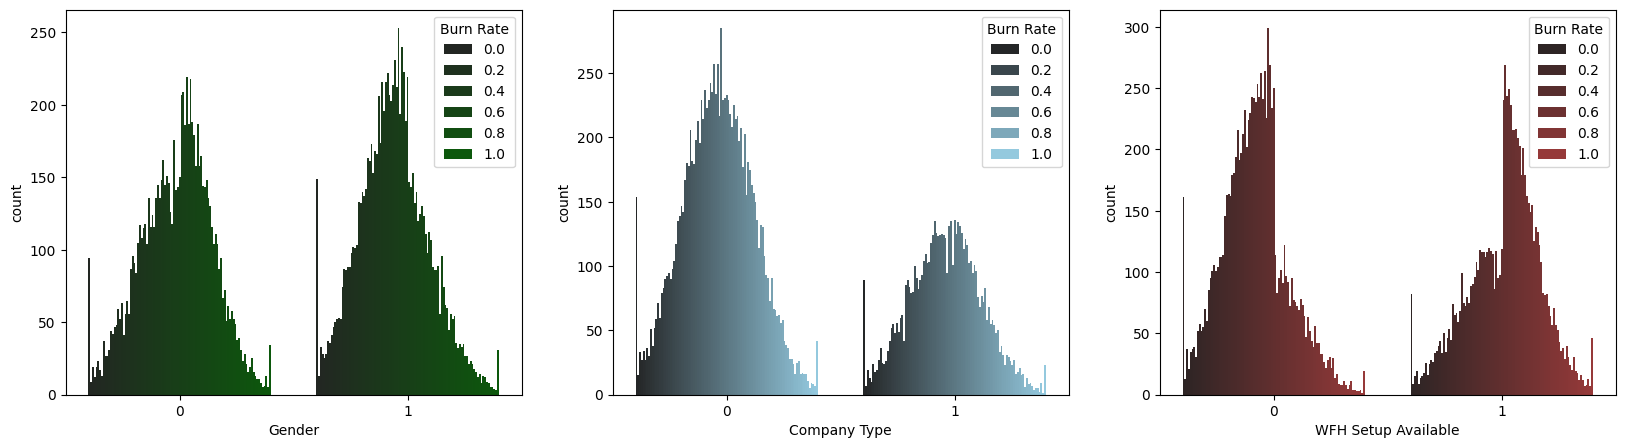

In [41]:
plt.figure(figsize=(20,5))
j=1
for i in ['Gender','Company Type','WFH Setup Available']:
    plt.subplot(1,3,j)
    c=['','darkgreen','skyblue','brown']
    sns.countplot(x=i,data=df,color=c[j],hue='Burn Rate')
    j+=1

In [43]:
df.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate',
       'Tenure (in years)'],
      dtype='object')

<Axes: xlabel='Tenure (in years)', ylabel='Resource Allocation'>

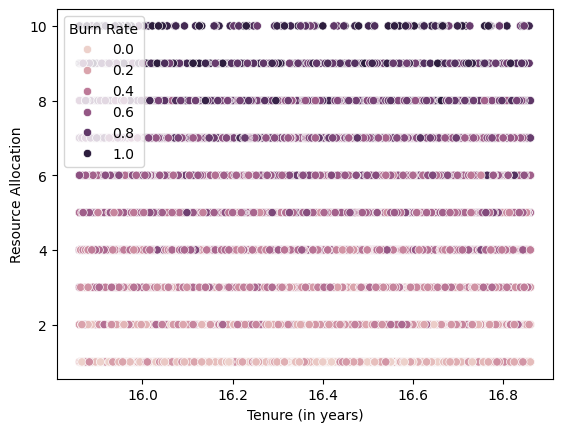

In [49]:
sns.scatterplot(y='Resource Allocation',x='Tenure (in years)',data=df,hue='Burn Rate')

<Axes: xlabel='Burn Rate', ylabel='Count'>

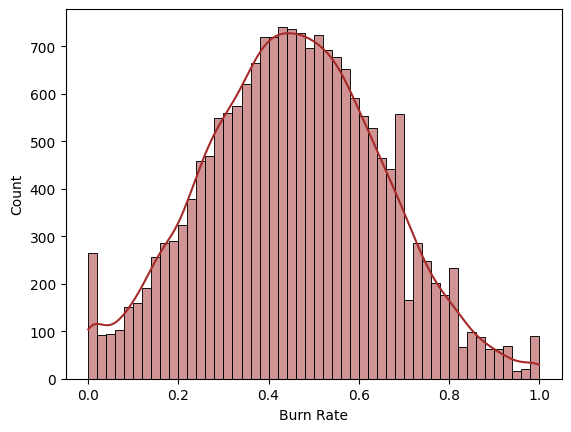

In [56]:
sns.histplot(x='Burn Rate',data=df,kde=True,color='brown')

#### Independent and dependent features

In [57]:
x=df.drop(['Burn Rate'],axis=1)
y=df['Burn Rate']

In [58]:
x

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Tenure (in years)
0,1,0,1,2,3.0,3.8,16.112329
1,0,0,0,1,2.0,5.0,15.945205
3,0,0,0,1,1.0,2.6,16.019178
4,1,0,1,3,7.0,6.9,16.298630
5,0,1,0,2,4.0,3.6,15.956164
...,...,...,...,...,...,...,...
22743,1,1,0,1,3.0,6.0,15.904110
22744,0,1,1,3,7.0,6.2,16.457534
22746,1,1,0,3,6.0,6.7,16.810959
22748,1,0,1,2,5.0,5.9,16.835616


In [59]:
y

0        0.16
1        0.36
3        0.20
4        0.52
5        0.29
         ... 
22743    0.48
22744    0.54
22746    0.59
22748    0.52
22749    0.61
Name: Burn Rate, Length: 18590, dtype: float64

#### Splitting data for training and testing

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [64]:
x_train.shape , x_test.shape

((13942, 7), (4648, 7))

#### Standardization

In [66]:
scaler=StandardScaler()
scaler

StandardScaler()

In [67]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [68]:
x_train

array([[ 0.95167545, -0.72598462, -0.9215839 , ..., -0.23844644,
        -0.12201678,  0.55600956],
       [ 0.95167545, -0.72598462, -0.9215839 , ...,  1.71537096,
         0.60597377,  1.48678705],
       [ 0.95167545, -0.72598462, -0.9215839 , ..., -0.72690079,
        -1.0060053 , -1.16307947],
       ...,
       [-1.05077839,  1.37743965,  1.0850884 , ..., -1.21535514,
        -0.43401272,  0.91692328],
       [ 0.95167545,  1.37743965, -0.9215839 , ..., -0.72690079,
        -0.33001408,  1.49628478],
       [ 0.95167545, -0.72598462,  1.0850884 , ...,  0.73846226,
         1.48996229, -1.37202952]])

In [69]:
x_test

array([[-1.05077839, -0.72598462, -0.9215839 , ..., -1.21535514,
        -0.95400597,  0.19509584],
       [-1.05077839, -0.72598462, -0.9215839 , ..., -0.23844644,
        -0.27801475,  1.42980068],
       [-1.05077839, -0.72598462,  1.0850884 , ..., -0.23844644,
        -0.5900107 , -1.09659537],
       ...,
       [ 0.95167545, -0.72598462, -0.9215839 , ..., -0.23844644,
         0.55397444,  0.92642101],
       [ 0.95167545,  1.37743965, -0.9215839 , ..., -0.23844644,
        -0.12201678,  0.87893237],
       [-1.05077839,  1.37743965,  1.0850884 , ..., -0.72690079,
         0.91796972, -0.49823841]])

### Model training

#### Logistic Regression

In [84]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Mean absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("R squared score : ",r2_score(y_test,y_pred))

Mean absolute Error:  0.0453948701008343
Mean Squared Error:  0.003048741909100865
R squared score :  0.9209148061733312


#### Random Forest

In [85]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Mean absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("R squared score : ",r2_score(y_test,y_pred))

Mean absolute Error:  0.045521870944663
Mean Squared Error:  0.0032283850804657385
R squared score :  0.9162548134777808


In [87]:
xg=XGBRegressor()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print("Mean absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("R squared score : ",r2_score(y_test,y_pred))

Mean absolute Error:  0.04409497704116351
Mean Squared Error:  0.002965931834842295
R squared score :  0.9230629220089125


In [88]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lr,open('lr.pkl','wb'))